In [1]:
import os
import tarfile
from six.moves import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH): 
  if not os.path.isdir(housing_path):
    os.makedirs(housing_path)
  tgz_path = os.path.join(housing_path, "housing.tgz")
  urllib.request.urlretrieve(housing_url, tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path)
  housing_tgz.close()

In [2]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH): 
  csv_path = os.path.join(housing_path, "housing.csv") 
  return pd.read_csv(csv_path)

In [3]:
fetch_housing_data()
housing_df = load_housing_data()

In [7]:
housing_df_original = housing_df.copy()

In [6]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing_df.shape

(20640, 10)

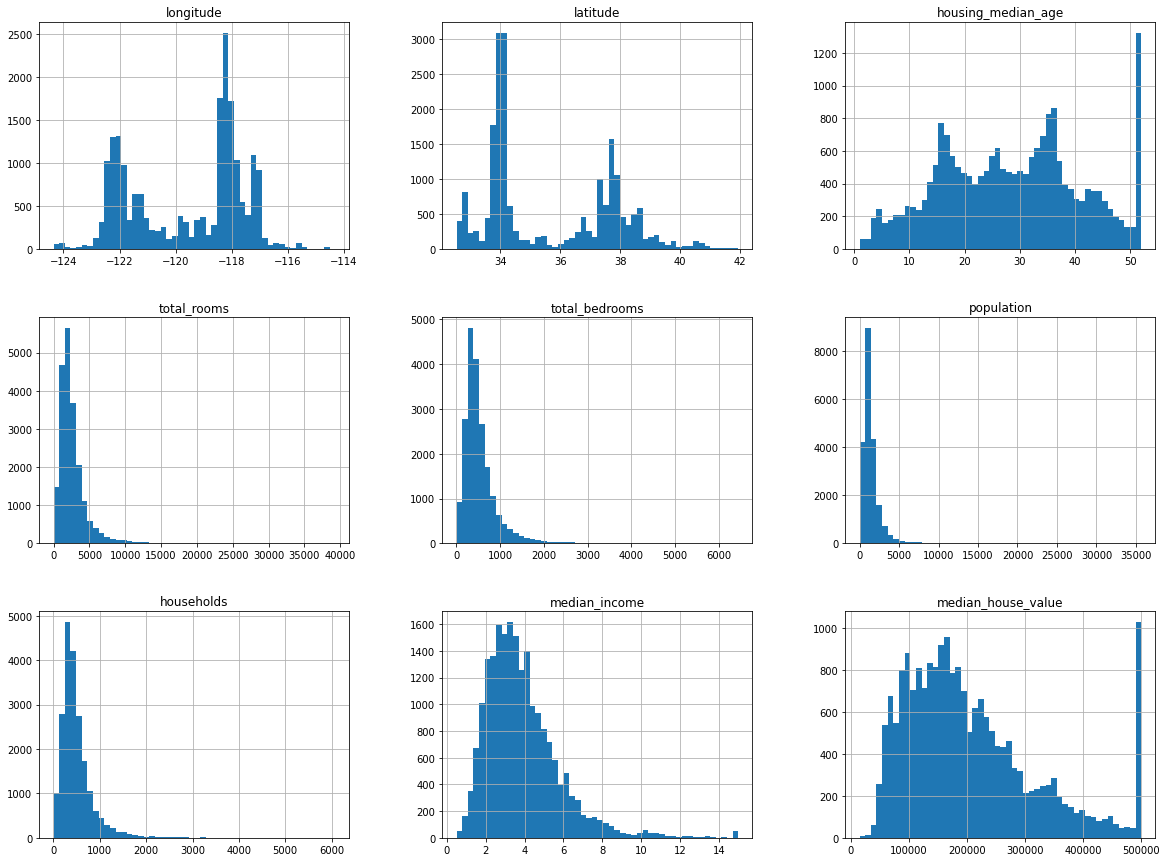

In [10]:
import matplotlib.pyplot as plt 

housing_df.hist(bins=50, figsize=(20,15))
plt.show()

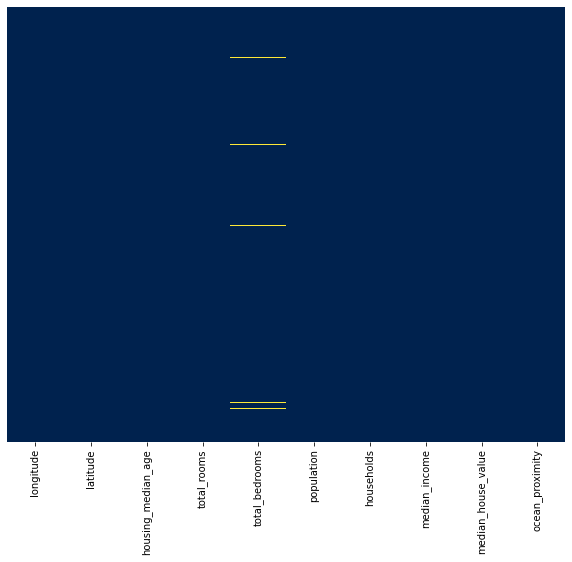

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(housing_df.isnull(), yticklabels=False, cbar=False, cmap='cividis')

In [12]:
housing_df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

#Creating bins for median income

Suppose you chatted with experts who told you that the median income is a very important attribute to predict median housing prices. 

You may want to ensure that the test set is representative of the various categories of incomes in the whole dataset

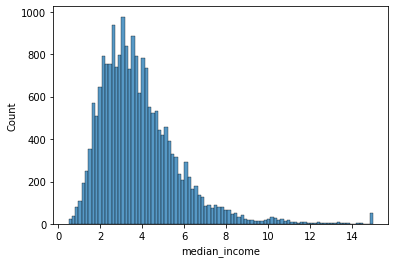

In [13]:
sns.histplot(housing_df.median_income)

In [14]:
#creating 5 categories 
bins=[0., 1.5, 3.0, 4.5, 6., np.inf]
labels=[1, 2, 3, 4, 5]
housing_df["income_cat"] = pd.cut(housing_df["median_income"], bins=bins, labels=labels)

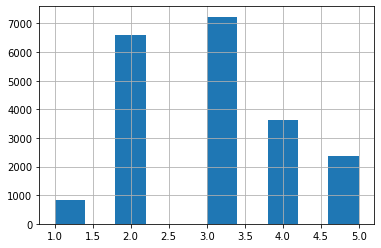

In [15]:
housing_df["income_cat"].hist()

# stratified train test split, based on median income bins



* housing_train
* housing_test



In [16]:
from sklearn.model_selection import StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state=42)

for train_index, test_index in stratified_split.split(housing_df, housing_df["income_cat"]):
  housing_train = housing_df.loc[train_index]
  housing_test = housing_df.loc[test_index]

In [17]:
housing_train.shape

(16512, 11)

In [18]:
housing_test.shape

(4128, 11)

In [19]:
housing_train['income_cat'].value_counts() / len(housing_train)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [20]:
housing_test['income_cat'].value_counts() / len(housing_test)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

we can now see that both housing train and housing test have almost same distributions of median income bins. 

In [21]:
#drop income cat bins columns, as we do not need them anymore

housing_train.drop('income_cat', axis=1, inplace=True)
housing_test.drop('income_cat', axis=1, inplace=True)

In [22]:
housing_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


In [23]:
housing_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


**things to do:**

prepapre data

create new features

impute total bedrooms

encode ocean proximity

scale

#prepare data

In [24]:
housing_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN


In [25]:
housing_train_target = housing_train.median_house_value

housing_train = housing_train.drop("median_house_value", axis=1)

#impute missing values, scaling, encoding

In [26]:
#get all the num features

numerics = ['int16','int32','int64','float16','float32','float64']
numerical_cols = list(housing_train.select_dtypes(include=numerics).columns)
housing_train_num = housing_train[numerical_cols]
housing_train_num.shape

(16512, 8)

In [27]:
object_cols = [col for col in housing_train.columns if housing_train[col].dtype == "object"]

In [28]:
housing_train_cat = housing_train[object_cols]
housing_train_cat.shape

(16512, 1)

In [29]:
housing_train_num.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [30]:
housing_train_cat.columns

Index(['ocean_proximity'], dtype='object')

In [316]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_train[object_cols])
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [317]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [31]:
housing_train_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [32]:
housing_train['total_bedrooms'].isna().value_counts()

False    16354
True       158
Name: total_bedrooms, dtype: int64

In [33]:
total_bedroom_median = housing_train['total_bedrooms'].median()

In [299]:
"""
1. num features -> impute missing, 
"""

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#pipeline for preprocessing num features
num_pipeline = Pipeline(
    [('imputer', SimpleImputer(strategy="median")),
     ('scaler', StandardScaler())
    ]
)

# housing_train_num_a = num_pipeline.fit_transform(housing_train_num)

# By default, the OneHotEncoder class returns a sparse array, 
# but we can convert it to a dense array if needed by calling the toarray() method OR set sparse=False
cat_pipeline = Pipeline(
    [('ohe', OneHotEncoder())]
)

num_cat_pipeline = ColumnTransformer(
    [("num_pipe", num_pipeline, numerical_cols),
     ("cat_pipe", cat_pipeline, object_cols)]
)

housing_train_prepare = num_cat_pipeline.fit_transform(housing_train)

In [300]:
housing_train_prepare.shape
#(16512, 13)

(16512, 13)

In [72]:
housing_train_prepare_df = pd.DataFrame(housing_train_prepare)

In [73]:
housing_train_prepare_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,1.0,0.0,0.0,0.0,0.0
1,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,1.0,0.0,0.0,0.0,0.0
2,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,0.0,0.0,0.0,0.0,1.0
3,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,0.0,1.0,0.0,0.0,0.0
4,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.722267,-0.673331,1.379547,-0.632123,-0.725361,-0.759010,-0.764049,0.554158,0.0,1.0,0.0,0.0,0.0
16508,1.007011,-0.823004,0.902385,-0.667196,-0.584183,-0.329664,-0.636291,-0.948815,0.0,1.0,0.0,0.0,0.0
16509,1.586489,-0.724781,-1.562952,1.043901,0.822735,0.607904,0.713156,-0.316705,0.0,1.0,0.0,0.0,0.0
16510,0.782213,-0.851068,0.186642,-0.309919,-0.374849,-0.057178,-0.375451,0.098121,1.0,0.0,0.0,0.0,0.0


In [301]:
cat_cols_name = num_cat_pipeline.transformers_[1][1].named_steps['ohe'].get_feature_names(object_cols)

In [77]:
cat_cols_name_list = cat_cols_name.tolist()

housing_train_prepare_df.columns = [numerical_cols + cat_cols_name_list]

In [78]:
housing_train_prepare_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,1.0,0.0,0.0,0.0,0.0
1,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,1.0,0.0,0.0,0.0,0.0
2,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,0.0,0.0,0.0,0.0,1.0
3,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,0.0,1.0,0.0,0.0,0.0
4,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.722267,-0.673331,1.379547,-0.632123,-0.725361,-0.759010,-0.764049,0.554158,0.0,1.0,0.0,0.0,0.0
16508,1.007011,-0.823004,0.902385,-0.667196,-0.584183,-0.329664,-0.636291,-0.948815,0.0,1.0,0.0,0.0,0.0
16509,1.586489,-0.724781,-1.562952,1.043901,0.822735,0.607904,0.713156,-0.316705,0.0,1.0,0.0,0.0,0.0
16510,0.782213,-0.851068,0.186642,-0.309919,-0.374849,-0.057178,-0.375451,0.098121,1.0,0.0,0.0,0.0,0.0


#create custom transformers

-to add extra attributes (bedrooms per room, rooms per household, population per household)

In [102]:
housing_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN


In [103]:
rooms_ix, bedrooms_ix, population_ix, hh_ix = [housing_train.columns.get_loc(c) for c in cols_a]

In [108]:
bedrooms_per_room = housing_train.values[:, bedrooms_ix] / housing_train.values[:, rooms_ix]
bedrooms_per_room

array([0.22385204081632654, 0.15905743740795286, 0.24129098360655737, ...,
       0.1796086508753862, 0.19387755102040816, 0.22035541195476574],
      dtype=object)

In [256]:
from sklearn.base import BaseEstimator, TransformerMixin

cols_a = ['total_rooms', 'total_bedrooms', 'population', 'households']
rooms_ix, bedrooms_ix, population_ix, hh_ix = [housing_train.columns.get_loc(c) for c in cols_a]

class CombinedAttributesAdder (BaseEstimator, TransformerMixin):
  def __init__(self, add_features = 0):
    self.add_features = add_features
  
  def fit(self, X, y=None):
    return self
  
  def transform(self, X):
    if self.add_features == 1:
      bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
      return np.c_[X, bedrooms_per_room]
    elif self.add_features == 2:
      bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
      rooms_per_household = X[:, rooms_ix] / X[:, hh_ix]
      return np.c_[X, bedrooms_per_room, rooms_per_household]
    elif self.add_features == 3:
      bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
      rooms_per_household = X[:, rooms_ix] / X[:, hh_ix]
      population_per_household = X[:, population_ix] / X[:, hh_ix]
      return np.c_[X, bedrooms_per_room, rooms_per_household, population_per_household]
    else:
      return X

In [ ]:
# attr_adder = CombinedAttributesAdder(add_features=0)
# housing_extra_attr = attr_adder.transform(housing_train)
# pd.DataFrame(housing_extra_attr)

In [159]:
#pipeline for preprocessing num and cat features

num_pipeline = Pipeline(
    # [('imputer', SimpleImputer(strategy="median")),
     [('adder', CombinedAttributesAdder()),
     ('scaler', StandardScaler())
    ]
)

cat_pipeline = Pipeline(
    [('ohe', OneHotEncoder())]
)

num_cat_pipeline = ColumnTransformer(
    [("num_pipe", num_pipeline, numerical_cols),
     ("cat_pipe", cat_pipeline, object_cols)]
)

housing_train_prepare_a = num_cat_pipeline.fit_transform(housing_train)

# full pipeline with prediction

In [173]:
#pipeline for preprocessing num features
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

num_pipeline = Pipeline(
    [('imputer', SimpleImputer(strategy="median")),
     ('adder', CombinedAttributesAdder()),
     ('scaler', StandardScaler())
    ]
)

cat_pipeline = Pipeline(
    [('ohe', OneHotEncoder())]
)

num_cat_pipeline = ColumnTransformer(
    [("num_pipe", num_pipeline, numerical_cols),
     ("cat_pipe", cat_pipeline, object_cols)]
)

full_pipeline = Pipeline(
    [("preparation", num_cat_pipeline),
    ("linear", LinearRegression())                                              
])

In [ ]:
# full_pipeline.fit(housing_train, housing_train_target)

In [177]:
housing_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN


In [182]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=full_pipeline, X=housing_train, y=housing_train_target, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1, verbose=10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   29.2s remaining:   19.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   39.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   39.2s finished


In [185]:
def display_scores(scores):
  print("scores: ", scores)
  print("mean: ", scores.mean())
  print("std: ", scores.std())

In [186]:
display_scores(scores)

scores:  [-47668.63838023 -49878.13042756 -51577.26864632 -49784.61507078
 -50709.93041842]
mean:  -49923.716588661366
std:  1300.7053202005968


#randomsearch cv

In [344]:
#pipeline for preprocessing num features
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

num_pipeline = Pipeline(
    [('imputer', SimpleImputer()),
     ('adder', CombinedAttributesAdder()),
     ('scaler', StandardScaler())
    ]
)

cat_pipeline = Pipeline(
    [('ohe', OneHotEncoder())]
)

num_cat_pipeline = ColumnTransformer(
    [("num_pipe", num_pipeline, numerical_cols),
     ("cat_pipe", cat_pipeline, object_cols)]
)

full_pipeline = Pipeline(
    [("preparation", num_cat_pipeline),
    ("rf_reg", RandomForestRegressor())                                              
])

In [258]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = [{"preparation__num_pipe__imputer__strategy" :['median', 'mean', 'most_frequent'],
               "preparation__num_pipe__adder__add_features" :[1, 2, 3, 0],
               "rf_reg__n_estimators": [30, 50],
               "rf_reg__max_features":[2,6,10],
               "rf_reg__min_samples_leaf":[1,2,4],
               "rf_reg__min_samples_split":[2,5,10]}            
]

In [264]:
forest_rs = RandomizedSearchCV(estimator=full_pipeline, param_distributions=param_grid, n_iter=10, cv=5, verbose=10,n_jobs=-1,
                               random_state=42, scoring='neg_root_mean_squared_error', return_train_score=True)

In [265]:
forest_rs.fit(housing_train, housing_train_target)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('preparation',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='drop',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('num_pipe',
                                                                               Pipeline(memory=None,
                                                                                        steps=[('imputer',
                                                                                                SimpleImputer(add_indicator=False,
                                                                                 

In [275]:
forest_rs.best_params_

{'preparation__num_pipe__adder__add_features': 3,
 'preparation__num_pipe__imputer__strategy': 'mean',
 'rf_reg__max_features': 10,
 'rf_reg__min_samples_leaf': 4,
 'rf_reg__min_samples_split': 5,
 'rf_reg__n_estimators': 50}

In [267]:
forest_rs.best_score_

-50071.957870268496

In [268]:
cv_results = forest_rs.cv_results_
# cv_results
for mean_scores, params in zip(cv_results['mean_test_score'], cv_results['params']):
  print(mean_scores, params)
  print("\n")

-50120.194056553315 {'rf_reg__n_estimators': 50, 'rf_reg__min_samples_split': 10, 'rf_reg__min_samples_leaf': 1, 'rf_reg__max_features': 10, 'preparation__num_pipe__imputer__strategy': 'most_frequent', 'preparation__num_pipe__adder__add_features': 0}


-55191.004970959235 {'rf_reg__n_estimators': 30, 'rf_reg__min_samples_split': 10, 'rf_reg__min_samples_leaf': 1, 'rf_reg__max_features': 2, 'preparation__num_pipe__imputer__strategy': 'mean', 'preparation__num_pipe__adder__add_features': 2}


-50432.776772416306 {'rf_reg__n_estimators': 50, 'rf_reg__min_samples_split': 10, 'rf_reg__min_samples_leaf': 4, 'rf_reg__max_features': 10, 'preparation__num_pipe__imputer__strategy': 'mean', 'preparation__num_pipe__adder__add_features': 0}


-50071.957870268496 {'rf_reg__n_estimators': 50, 'rf_reg__min_samples_split': 5, 'rf_reg__min_samples_leaf': 4, 'rf_reg__max_features': 10, 'preparation__num_pipe__imputer__strategy': 'mean', 'preparation__num_pipe__adder__add_features': 3}


-50981.8757082365

#feature importance

In [271]:
forest_rs.best_estimator_[1]

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=10, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [347]:
extra_cols = ["bedrooms_per_room", "rooms_per_household", "population_per_household"]

encoder_cols = list(cat_encoder.categories_[0])

# cat_encoder = full_pipeline[0].named_transformers_['cat_pipe']

attr_cols = numerical_cols + encoder_cols + extra_cols

feature_importance = forest_rs.best_estimator_[1].feature_importances_
sorted(zip(feature_importance, attr_cols), reverse=True)

[(0.44644303835821636, 'median_income'),
 (0.15759503075877632, 'NEAR OCEAN'),
 (0.11819690799510248, 'ISLAND'),
 (0.061418597458079836, 'longitude'),
 (0.057699732584457604, 'latitude'),
 (0.045769756310418325, '<1H OCEAN'),
 (0.04169704164544937, 'housing_median_age'),
 (0.026887473136354752, 'INLAND'),
 (0.009622681944588601, 'total_rooms'),
 (0.009212272961717302, 'households'),
 (0.00919789206820029, 'population'),
 (0.008945178235542523, 'total_bedrooms'),
 (0.0032468154909534325, 'NEAR BAY'),
 (0.0026880566198419094, 'population_per_household'),
 (0.001379524432300939, 'rooms_per_household'),
 (0.0, 'bedrooms_per_room')]

#eval model on test dataset

In [351]:
X_test = housing_test.drop("median_house_value", axis=1)

y_test = housing_test.median_house_value.copy()

In [361]:
best_model = forest_rs.best_estimator_

#best_model[0] -> fit transform
#best_model[1] -> predict

In [362]:
X_test_prepared = best_model[0].fit_transform(X_test)

In [363]:
pd.DataFrame(X_test_prepared)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.574715,-0.696209,0.032860,1.602628,1.024048,0.614715,1.105510,2.357904,-0.854250,0.730902,-0.437080,1.0,0.0,0.0,0.0,0.0
1,0.838394,-0.860742,0.824710,0.627178,0.233621,0.184453,0.347308,0.404516,-0.846616,0.551471,-0.254840,1.0,0.0,0.0,0.0,0.0
2,0.246359,-0.653901,-0.125511,0.711592,0.833637,0.552891,0.899397,-0.446556,-0.034695,-0.224920,-0.352712,1.0,0.0,0.0,0.0,0.0
3,0.694117,-0.658602,1.854116,-0.384511,-0.539094,-0.359433,-0.459968,0.160083,-0.642421,0.089414,0.122418,0.0,1.0,0.0,0.0,0.0
4,0.927946,-0.719714,0.270415,-0.389200,-0.521381,-0.318495,-0.509043,0.099254,-0.560275,0.270989,0.356963,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4123,-0.987461,1.400413,0.349600,0.980608,1.371659,0.806872,1.387689,-0.999550,0.287333,-0.408056,-0.455647,0.0,1.0,0.0,0.0,0.0
4124,-0.445177,-0.447059,0.112045,-0.180297,-0.082993,-0.038615,-0.094363,-0.998379,0.164695,-0.315366,0.005755,0.0,0.0,0.0,0.0,1.0
4125,0.524964,-0.668003,0.191230,0.164180,0.275688,0.031563,0.428281,0.557413,0.065584,-0.488889,-0.501762,1.0,0.0,0.0,0.0,0.0
4126,1.107049,-0.757321,-0.125511,1.183542,0.665367,0.795175,0.801248,0.457681,-0.875028,0.632273,-0.061039,0.0,1.0,0.0,0.0,0.0


In [367]:
y_pred = best_model[1].predict(X_test_prepared)

In [369]:
from sklearn.metrics import mean_squared_error

final_mse = mean_squared_error(y_test, y_pred)
final_rmse = np.sqrt(final_mse)
final_rmse

70131.18646912018